# In the notebook we illustrate the measurement of $g$ 

First, we start by generating a pseudo dataset

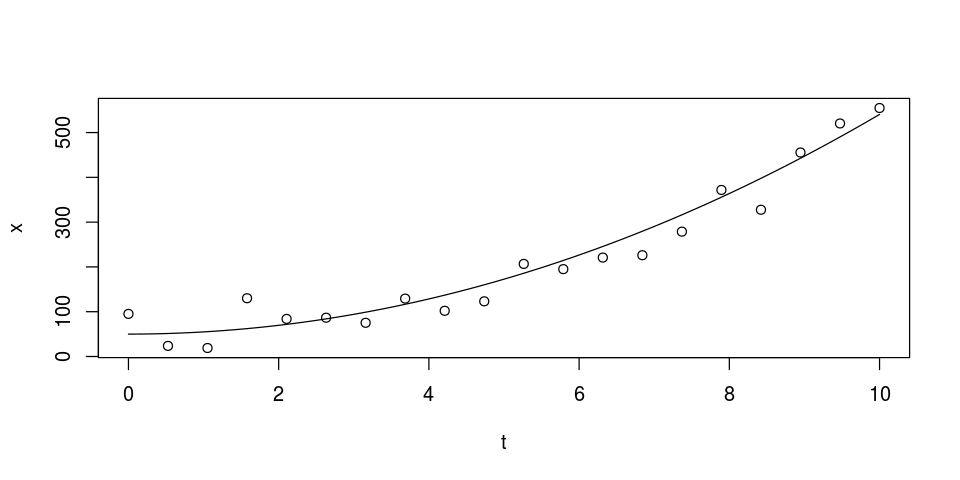

In [73]:
Npoints = 20
x0 = 50
g = 9.81
t = seq(0, 10, length=Npoints)
x = 0.5*g*t^2 + x0 + rnorm(Npoints, mean=0, sd=40)
plot(t, x)
curve(0.5*g*x^2+x0, from=0, to=10, add=T)

ds = data.frame(t, x)
write.csv(ds, "PositionVsTime.csv")

(Intercept) I(0.5 * myt^2) 
     45.679515       9.681039

,(Intercept),I(0.5 * myt^2)
(Intercept),142.000150,-4.5006193
I(0.5 * myt^2),-4.500619,0.2631131


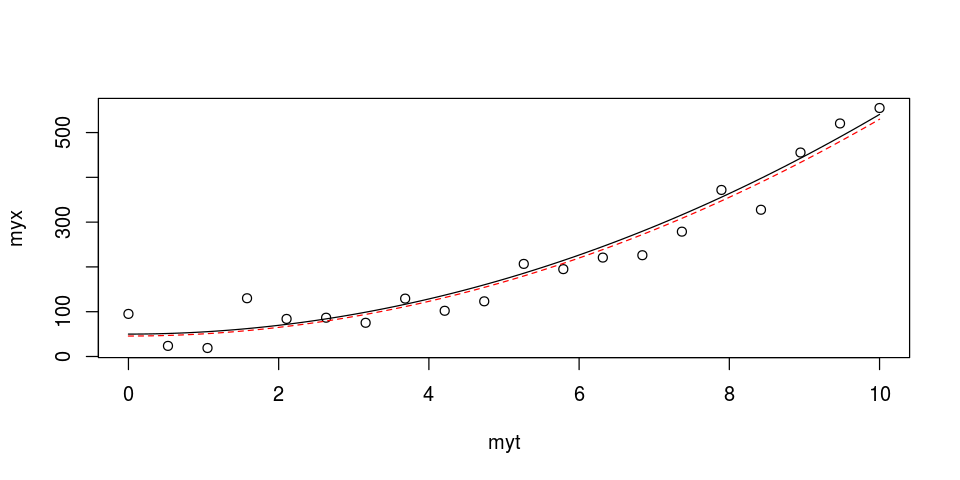

In [75]:
myds = read.csv("PositionVsTime.csv")
#myds

myx = myds$x
myt = myds$t

options(repr.plot.width=8, repr.plot.height=4)

plot(myx ~ myt)
#model <- lm(myx ~ 0 + mytSq, offset=rep(x0, length(myx)), data=myds)
#model <- lm(myx ~ 0 + I(0.5*myt^2), offset=rep(x0, length(myx)), data=myds)
model <- lm(myx ~ I(0.5*myt^2), data=myds)
coef = coef(model)
coef
vcov(model)

curve(0.5*g*x^2+x0, from=0, to=10, add=T)
curve(0.5*coef[2]*x^2+coef[1], from=0, to=10, add=T, col="red", lty=2)

# As in the previous notebook, we can also compute the solution by hand:
#myT <- cbind(0.5*myt^2, 1)
#n <- length(myt)
#thetaHat <- solve(t(myT) %*% myT) %*% t(myT) %*% myx
#sigmaSqHat <- 1/(n-2)*sum((myx-(0.5*coef[2]*myt^2 + coef[1]))^2)
#covMatrix <- sigmaSqHat * solve(t(myT) %*% myT)
#thetaHat
#covMatrix
